In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Final_data_to_analyze.csv")

In [3]:
df.head()

,Name,Price,Discount,categories
0,OPPO F19 6 GB 128 GB Prism Black,19490.0,-7%,Mobile_phones
1,OPPO A54 4 GB 64 GB Crystal Black,14178.0,-5%,Mobile_phones
2,Redmi 9 4 GB 64 GB Sky Blue,10449.0,-5%,Mobile_phones
3,Vivo Y20i 3 GB 64 GB Nebula Blue,11490.0,-26%,Mobile_phones
4,OPPO A54 6 GB 128 GB Crystal Black,16990.0,-6%,Mobile_phones


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        160 non-null    object 
 1   Price       160 non-null    float64
 2   Discount    154 non-null    object 
 3   categories  161 non-null    object 
dtypes: float64(1), object(3)
memory usage: 5.2+ KB


## Analyzing/Dropping Null values

In [6]:
df.isnull().sum()

Name          0
Price         0
Discount      6
categories    0
dtype: int64

In [ ]:
df.dropna(subset=['Name', 'Price'], inplace=True)

In [7]:
df.columns

Index(['Name', 'Price', 'Discount ', 'categories'], dtype='object')

In [8]:
df.rename(columns={'Discount ':'Discount'},inplace=True)

In [9]:
df.isnull().sum()

Name          0
Price         0
Discount      6
categories    0
dtype: int64

In [10]:
df.columns

Index(['Name', 'Price', 'Discount', 'categories'], dtype='object')

In [11]:
df[df.Discount.isnull()]
df.Discount.fillna("0", inplace=True)

In [12]:
df.Discount.isnull().sum()

0

## Adding Features of the Phones to a new column

In [13]:
df["feature_of_phone"]= "NA"

In [14]:
df["feature_of_phone"]=df.Name.apply(lambda x: ' '.join(x.split(' ')[2:7]))

In [15]:
df.loc[~(df['categories']=="Mobile_phones"), "feature_of_phone"]='NA'

In [16]:
df.feature_of_phone.value_counts()

NA                                  128
5G 6 GB 128 GB                        2
Pro 8 GB 256 GB                       2
Note 20 8 GB 256                      1
A52 6 GB 128 GB                       1
1b 4 GB 64 GB                         1
4 GB 64 GB Crystal                    1
Pro 12 GB 256 GB                      1
4 GB 64 GB Sky                        1
12 GB 256 GB Glacial                  1
A22 6 GB 128 GB                       1
11 128 GB Green(Without Earphone      1
2021 2 GB 32 GB                       1
7 2 GB 32 GB                          1
3 GB 64 GB Nebula                     1
M31 6 GB 128 GB                       1
3 GB 32 GB Phantom                    1
3 GB 32 GB (Arctic                    1
6 GB 128 GB Prism                     1
8 GB 128 GB Midday                    1
5G 8 GB 256 GB                        1
6 GB 128 GB Crystal                   1
4 GB 64 GB Obsidian                   1
2 GB 32 GB Midnight                   1
4 GB 64 GB Purist                     1


In [17]:
df.head()

,Name,Price,Discount,categories,feature_of_phone
0,OPPO F19 6 GB 128 GB Prism Black,19490.0,-7%,Mobile_phones,6 GB 128 GB Prism
1,OPPO A54 4 GB 64 GB Crystal Black,14178.0,-5%,Mobile_phones,4 GB 64 GB Crystal
2,Redmi 9 4 GB 64 GB Sky Blue,10449.0,-5%,Mobile_phones,4 GB 64 GB Sky
3,Vivo Y20i 3 GB 64 GB Nebula Blue,11490.0,-26%,Mobile_phones,3 GB 64 GB Nebula
4,OPPO A54 6 GB 128 GB Crystal Black,16990.0,-6%,Mobile_phones,6 GB 128 GB Crystal


In [18]:
df["feature_of_phone"]= df["feature_of_phone"].apply(lambda x: x.replace('(', ''))

In [19]:
df.feature_of_phone.value_counts()

NA                                 128
5G 6 GB 128 GB                       2
Pro 8 GB 256 GB                      2
Note 20 8 GB 256                     1
A52 6 GB 128 GB                      1
1b 4 GB 64 GB                        1
4 GB 64 GB Crystal                   1
Pro 12 GB 256 GB                     1
4 GB 64 GB Sky                       1
12 GB 256 GB Glacial                 1
A22 6 GB 128 GB                      1
5G 8 GB 256 GB                       1
2021 2 GB 32 GB                      1
7 2 GB 32 GB                         1
3 GB 64 GB Nebula                    1
M31 6 GB 128 GB                      1
8 GB 128 GB Midday                   1
3 GB 32 GB Phantom                   1
6 GB 128 GB Prism                    1
3 GB 32 GB Arctic                    1
6 GB 128 GB Crystal                  1
4 GB 64 GB Obsidian                  1
2 GB 32 GB Midnight                  1
4 GB 64 GB Purist                    1
Pro 6 GB 128 GB                      1
2 GB 32 GB Sea           

In [20]:
df.Discount.value_counts()

-59%    10
-63%    10
-10%     9
0        6
-57%     6
        ..
-89%     1
-81%     1
-44%     1
-86%     1
-67%     1
Name: Discount, Length: 65, dtype: int64

## changing Discount Percentage to numerical column

In [21]:
df["Discount"]= df.Discount.apply(lambda x: x.replace("-",''))
df["Discount_Percent"]= df.Discount.apply(lambda x: int(x.replace("%",'')))

In [22]:
df.head()

,Name,Price,Discount,categories,feature_of_phone,Discount_Percent
0,OPPO F19 6 GB 128 GB Prism Black,19490.0,7%,Mobile_phones,6 GB 128 GB Prism,7
1,OPPO A54 4 GB 64 GB Crystal Black,14178.0,5%,Mobile_phones,4 GB 64 GB Crystal,5
2,Redmi 9 4 GB 64 GB Sky Blue,10449.0,5%,Mobile_phones,4 GB 64 GB Sky,5
3,Vivo Y20i 3 GB 64 GB Nebula Blue,11490.0,26%,Mobile_phones,3 GB 64 GB Nebula,26
4,OPPO A54 6 GB 128 GB Crystal Black,16990.0,6%,Mobile_phones,6 GB 128 GB Crystal,6


In [23]:
df.Discount_Percent.value_counts()

59    10
63    10
10     9
0      6
57     6
      ..
23     1
56     1
22     1
20     1
91     1
Name: Discount_Percent, Length: 65, dtype: int64

In [24]:
df["Actual_Price"]= df["Price"] *100/(100-df["Discount_Percent"])

In [25]:
df.head()

,Name,Price,Discount,categories,feature_of_phone,Discount_Percent,Actual_Price
0,OPPO F19 6 GB 128 GB Prism Black,19490.0,7%,Mobile_phones,6 GB 128 GB Prism,7,20956.989247
1,OPPO A54 4 GB 64 GB Crystal Black,14178.0,5%,Mobile_phones,4 GB 64 GB Crystal,5,14924.210526
2,Redmi 9 4 GB 64 GB Sky Blue,10449.0,5%,Mobile_phones,4 GB 64 GB Sky,5,10998.947368
3,Vivo Y20i 3 GB 64 GB Nebula Blue,11490.0,26%,Mobile_phones,3 GB 64 GB Nebula,26,15527.027027
4,OPPO A54 6 GB 128 GB Crystal Black,16990.0,6%,Mobile_phones,6 GB 128 GB Crystal,6,18074.468085


In [26]:
df["Actual_Price"]=df["Actual_Price"].apply(lambda x: float(np.round(x,2)))

In [27]:
df.head()

,Name,Price,Discount,categories,feature_of_phone,Discount_Percent,Actual_Price
0,OPPO F19 6 GB 128 GB Prism Black,19490.0,7%,Mobile_phones,6 GB 128 GB Prism,7,20956.99
1,OPPO A54 4 GB 64 GB Crystal Black,14178.0,5%,Mobile_phones,4 GB 64 GB Crystal,5,14924.21
2,Redmi 9 4 GB 64 GB Sky Blue,10449.0,5%,Mobile_phones,4 GB 64 GB Sky,5,10998.95
3,Vivo Y20i 3 GB 64 GB Nebula Blue,11490.0,26%,Mobile_phones,3 GB 64 GB Nebula,26,15527.03
4,OPPO A54 6 GB 128 GB Crystal Black,16990.0,6%,Mobile_phones,6 GB 128 GB Crystal,6,18074.47


In [28]:
df.categories.value_counts()

Computer_Accesories      32
grooming_accesories      32
Headphones               32
Electronic_Accesories    32
Mobile_phones            32
Name: categories, dtype: int64

In [29]:
df[df["categories"]=="Headphones"]

,Name,Price,Discount,categories,feature_of_phone,Discount_Percent,Actual_Price
33,boAt Bassheads 103 In-Ear,399.0,69%,Headphones,NA,69,1287.10
34,realme Buds 2 Neo With HD,549.0,8%,Headphones,NA,8,596.74
35,Boult Audio ProBass Curve,999.0,78%,Headphones,NA,78,4540.91
36,boAt Rockerz 235v2 In-Ear,1199.0,60%,Headphones,NA,60,2997.50
37,boAt Bassheads 103 In-Ear,399.0,69%,Headphones,NA,69,1287.10
38,Boult Audio AirBass Combu,1299.0,74%,Headphones,NA,74,4996.15
39,Tiitan S9 In-Ear Wired He,189.0,81%,Headphones,NA,81,994.74
40,Portronics Conch Gama POR,299.0,50%,Headphones,NA,50,598.00
41,Noise Air Buds True Wirel,2199.0,63%,Headphones,NA,63,5943.24
42,boAt Airdopes 138 True Wi,1299.0,57%,Headphones,NA,57,3020.93


In [30]:
df

,Name,Price,Discount,categories,feature_of_phone,Discount_Percent,Actual_Price
0,OPPO F19 6 GB 128 GB Prism Black,19490.0,7%,Mobile_phones,6 GB 128 GB Prism,7,20956.99
1,OPPO A54 4 GB 64 GB Crystal Black,14178.0,5%,Mobile_phones,4 GB 64 GB Crystal,5,14924.21
2,Redmi 9 4 GB 64 GB Sky Blue,10449.0,5%,Mobile_phones,4 GB 64 GB Sky,5,10998.95
3,Vivo Y20i 3 GB 64 GB Nebula Blue,11490.0,26%,Mobile_phones,3 GB 64 GB Nebula,26,15527.03
4,OPPO A54 6 GB 128 GB Crystal Black,16990.0,6%,Mobile_phones,6 GB 128 GB Crystal,6,18074.47
...,...,...,...,...,...,...,...
156,RRTBZ Back Case Cover for,389.0,63%,Electronic_Accesories,NA,63,1051.35
157,RRTBZ Back Case Cover for,429.0,59%,Electronic_Accesories,NA,59,1046.34
158,RRTBZ Camera Protection B,299.0,63%,Electronic_Accesories,NA,63,808.11
159,RRTBZ TPU Back Cover for,349.0,59%,Electronic_Accesories,NA,59,851.22


In [35]:
df.drop(["Discount"], axis='columns', inplace=True)

In [36]:
df.head()

,Name,Price,categories,feature_of_phone,Discount_Percent,Actual_Price
0,OPPO F19 6 GB 128 GB Prism Black,19490.0,Mobile_phones,6 GB 128 GB Prism,7,20956.99
1,OPPO A54 4 GB 64 GB Crystal Black,14178.0,Mobile_phones,4 GB 64 GB Crystal,5,14924.21
2,Redmi 9 4 GB 64 GB Sky Blue,10449.0,Mobile_phones,4 GB 64 GB Sky,5,10998.95
3,Vivo Y20i 3 GB 64 GB Nebula Blue,11490.0,Mobile_phones,3 GB 64 GB Nebula,26,15527.03
4,OPPO A54 6 GB 128 GB Crystal Black,16990.0,Mobile_phones,6 GB 128 GB Crystal,6,18074.47


## Adding more Categorical columns for better Analysis

In [38]:
df.Price.value_counts()

399.0      12
299.0       7
1299.0      7
349.0       4
899.0       4
           ..
1240.0      1
18499.0     1
29990.0     1
385.0       1
729.0       1
Name: Price, Length: 99, dtype: int64

In [39]:
pd.qcut(df['Price'], q=4)

0      (2161.5, 170599.0]
1      (2161.5, 170599.0]
2      (2161.5, 170599.0]
3      (2161.5, 170599.0]
4      (2161.5, 170599.0]
              ...        
156      (188.999, 396.5]
157        (396.5, 798.5]
158      (188.999, 396.5]
159      (188.999, 396.5]
160      (188.999, 396.5]
Name: Price, Length: 160, dtype: category
Categories (4, interval[float64]): [(188.999, 396.5] < (396.5, 798.5] < (798.5, 2161.5] < (2161.5, 170599.0]]

In [43]:
Price_labels= ["very_low", "low", "medium", "high", "very_high" ]
df["Price Categories"] = pd.qcut(df["Price"], q=[0.0, 0.25, 0.5, 0.75, 0.95, 1], labels=Price_labels)

In [44]:
df.head()

,Name,Price,categories,feature_of_phone,Discount_Percent,Actual_Price,Price Categories
0,OPPO F19 6 GB 128 GB Prism Black,19490.0,Mobile_phones,6 GB 128 GB Prism,7,20956.99,high
1,OPPO A54 4 GB 64 GB Crystal Black,14178.0,Mobile_phones,4 GB 64 GB Crystal,5,14924.21,high
2,Redmi 9 4 GB 64 GB Sky Blue,10449.0,Mobile_phones,4 GB 64 GB Sky,5,10998.95,high
3,Vivo Y20i 3 GB 64 GB Nebula Blue,11490.0,Mobile_phones,3 GB 64 GB Nebula,26,15527.03,high
4,OPPO A54 6 GB 128 GB Crystal Black,16990.0,Mobile_phones,6 GB 128 GB Crystal,6,18074.47,high


## Performing Exploratory Data Analysis to the cleansed Data

- Univariate Analysis
- Bivariate Analysis
- Multi Variate Analysis

<Figure size 792x576 with 0 Axes>

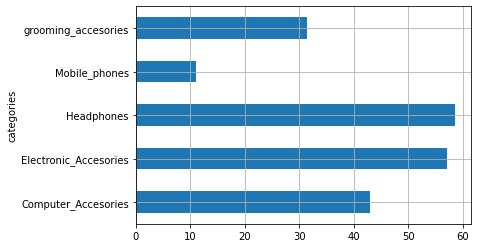

<Figure size 792x576 with 0 Axes>

In [49]:
df["Discount_Percent"].groupby(df.categories).mean().plot.barh()
plt.grid()
plt.figure(figsize=(11,8))

- We can clearly see that the Mobile Phones have the least discount Percentage in Headphones There may be trend of new phones not adding earphones in the package we can clearly see that headphones has the most discount Percentage

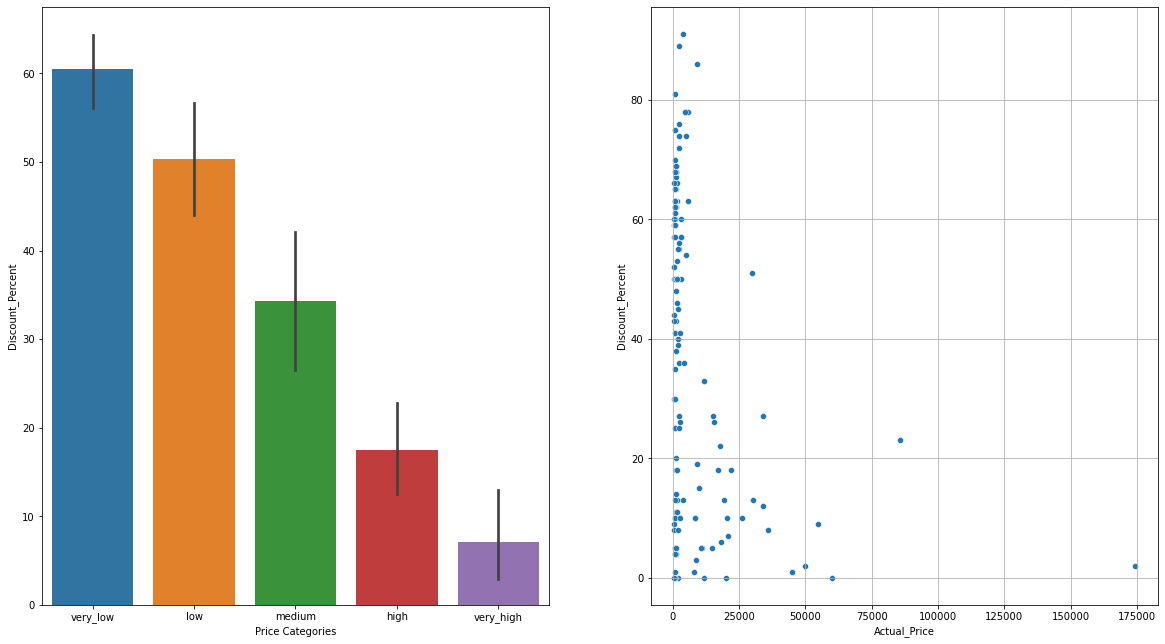

In [59]:
plt.figure(figsize=(20,11))

plt.subplot(1,2,1)
sns.barplot(x=df["Price Categories"], y=df["Discount_Percent"])
plt.subplot(1,2,2)
sns.scatterplot(x=df["Actual_Price"], y= df["Discount_Percent"])
plt.grid()


- Here we can see as the price increases the Discount Percent decreases Most of the discounts are in Actual_Price range of 0-25,000

In [60]:
df["Price"].describe()

count       160.000000
mean       6197.206250
std       17081.769628
min         189.000000
25%         396.500000
50%         798.500000
75%        2161.500000
max      170599.000000
Name: Price, dtype: float64

<AxesSubplot:ylabel='categories'>

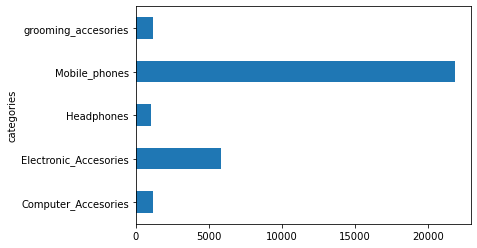

In [61]:
df["Price"].groupby(df.categories).mean().plot.barh()

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

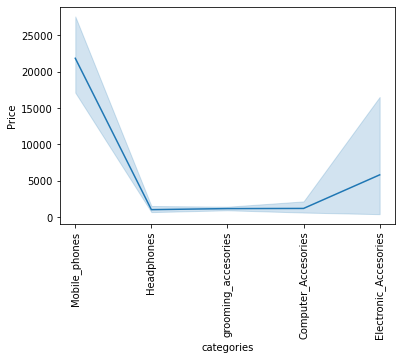

In [69]:
sns.lineplot(x=df.categories, y= df.Price)
plt.xticks(rotation=90)

In [91]:
res= pd.pivot_table(data= df, index= "categories", columns=["Price Categories"], values=["Discount_Percent"])
res


Discount_Percent                                       
Price Categories              very_low        low     medium   high very_high
categories                                                                   
Computer_Accesories          57.090909  45.222222  25.100000  43.50       NaN
Electronic_Accesories        61.368421  58.200000  20.000000  54.00  2.000000
Headphones                   54.500000  56.583333  64.166667  48.00       NaN
Mobile_phones                      NaN        NaN        NaN  11.92  7.857143
grooming_accesories          75.000000  38.666667  19.588235  11.50       NaN

Text(0.5, 1.0, 'Multivariate_analysis of Electronic categories and Price Categories\n')

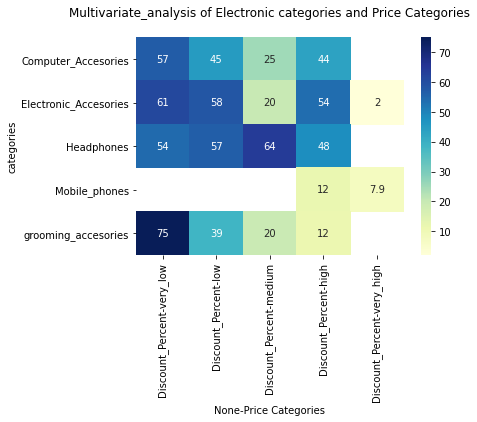

In [92]:
sns.heatmap(res, cmap="YlGnBu", annot=True)
plt.title("Multivariate_analysis of Electronic categories and Price Categories\n")

### Summary of Analysis
- We can see the Discount percentage decreases with the increase in the Price
- We can see the Phones have the lowest discount Percentage
- We can see that the Phones have the lowest discount rates
- We can see that Headphones have the highest discount rates and the price vary from (very low to high)
- Mobile phones are not reasonable as comapred to other electronics and there discounts are low, but few electronic accesories have the least discount percentages
- Electronic accesories have a wide market cap they are available in very low price and the have very high pricing. They also provide the wide range of discounts too